In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

%matplotlib inline

In [2]:
#check to make sure gpu is seen
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [30]:
df = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/processed_data_all_participants.pkl')
df.head(5)

,time_stamp[sec],user_id,activity_label,gt_heart_rate[BPM],skin_temp[C],EDA[microS],fft_N,fft_xf,BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
0,8.0,S1,0.0,49.611369,32.148125,4.716872,512,"[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....","[3.3845378816808207, 3.38976858233557, 3.52446...","[2.562674132862977, 0.11143156956661938, -0.52...","[1.1527868740280884, 0.49716310471656544, 0.12...","[2.033443262692457, 0.9587489502954717, -0.741..."
1,10.0,S1,0.0,50.323992,32.148788,4.728222,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[3.808383411435166, 4.4141701914009355, 3.0151...","[2.6222823617278266, 0.18563611962841808, -0.4...","[1.1803303061912271, 0.4308321382652773, 0.210...","[1.7456387682027168, 0.8206843400998957, 0.449..."
2,12.0,S1,0.0,52.708336,32.14697,4.739054,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[0.7342695069401706, 4.209209912863593, 3.5781...","[2.6734746500403324, -0.24896037304427496, -0....","[1.2779290837408603, 0.41187321007690075, 0.01...","[1.3509071508955937, -0.19744507193934496, -0...."
3,14.0,S1,0.0,55.640794,32.144545,4.78867,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[2.770051706946417, 4.174047012599668, 2.65538...","[2.5951888190615753, 0.8157803941949502, 0.627...","[1.5922120167574618, 1.0553402247077845, 0.721...","[1.3871223788226001, 0.037125024476421804, -0...."
4,16.0,S1,0.0,57.658406,32.143939,4.83025,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[4.333172257340451, 4.684529918870272, 4.49636...","[2.502046403655502, 1.1114429814184918, 0.3677...","[1.5711258620389141, 1.2133099373393048, 0.999...","[1.7460670246045409, 0.8034598015137145, 0.323..."


In [4]:
df['user_id'].value_counts()

S10    5321
S7     4668
S5     4649
S1     4603
S4     4572
S13    4565
S11    4521
S14    4476
S3     4367
S9     4277
S2     4099
S8     4037
S15    3966
S12    3954
S6     2622
Name: user_id, dtype: int64

In [5]:
df['activity_label'].value_counts()

0.0    17495
6.0    13552
8.0     8502
5.0     6845
7.0     4697
1.0     4573
4.0     3479
2.0     3242
3.0     2312
Name: activity_label, dtype: int64

In [32]:
df['user_id'].value_counts(normalize=True)

S10    0.082245
S7     0.072152
S5     0.071858
S1     0.071147
S4     0.070668
S13    0.070560
S11    0.069880
S14    0.069184
S3     0.067499
S9     0.066108
S2     0.063357
S8     0.062399
S15    0.061301
S12    0.061116
S6     0.040527
Name: user_id, dtype: float64

In [31]:
df['activity_label'].value_counts(normalize=True)

0.0    0.270414
6.0    0.209469
8.0    0.131413
5.0    0.105801
7.0    0.072600
1.0    0.070683
4.0    0.053774
2.0    0.050111
3.0    0.035736
Name: activity_label, dtype: float64

In [36]:
y_for_splitting = df['user_id'].astype('str') + '_' + df['activity_label'].astype('int').astype('str')
y_for_splitting.head(1)

0    S1_0
dtype: object

In [34]:
X_w_label = df[['user_id','activity_label','gt_heart_rate[BPM]','skin_temp[C]','EDA[microS]','BVP_powerSpect','ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']]
X_w_label.head(1)

,user_id,activity_label,gt_heart_rate[BPM],skin_temp[C],EDA[microS],BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
0,S1,0.0,49.611369,32.148125,4.716872,"[3.3845378816808207, 3.38976858233557, 3.52446...","[2.562674132862977, 0.11143156956661938, -0.52...","[1.1527868740280884, 0.49716310471656544, 0.12...","[2.033443262692457, 0.9587489502954717, -0.741..."


# split out a testing set

use a concated version of the user_id and the activity id to split with the label (gt_hr) in the X then slicy y_train/test out of X verify that fractions of classes are ~ maintained.

In [15]:
(X_train_wlabel, X_test_wlabel) = train_test_split(X_w_label, y_for_splitting, test_size=0.15, stratify=y_for_splitting)[:2]

In [16]:
y_train = X_train_wlabel['gt_heart_rate[BPM]']
y_test = X_test_wlabel['gt_heart_rate[BPM]']
X_train = X_train_wlabel.drop(columns='gt_heart_rate[BPM]')
X_test = X_test_wlabel.drop(columns='gt_heart_rate[BPM]')

In [19]:
X_train.shape

(54992, 8)

In [20]:
X_test.shape

(9705, 8)

In [41]:
df['user_id'].value_counts(normalize=True) - X_test['user_id'].value_counts(normalize=True)

S10    0.000019
S7     0.000024
S5     0.000039
S1    -0.000053
S4    -0.000017
S13    0.000081
S11    0.000019
S14   -0.000059
S3     0.000008
S9     0.000060
S2    -0.000116
S8     0.000060
S15    0.000096
S12   -0.000090
S6    -0.000070
Name: user_id, dtype: float64

In [40]:
df['activity_label'].value_counts(normalize=True) - X_test['activity_label'].value_counts(normalize=True)

0.0    0.000038
6.0   -0.000114
8.0    0.000037
5.0   -0.000021
7.0    0.000060
1.0   -0.000002
4.0   -0.000013
2.0    0.000136
3.0   -0.000122
Name: activity_label, dtype: float64

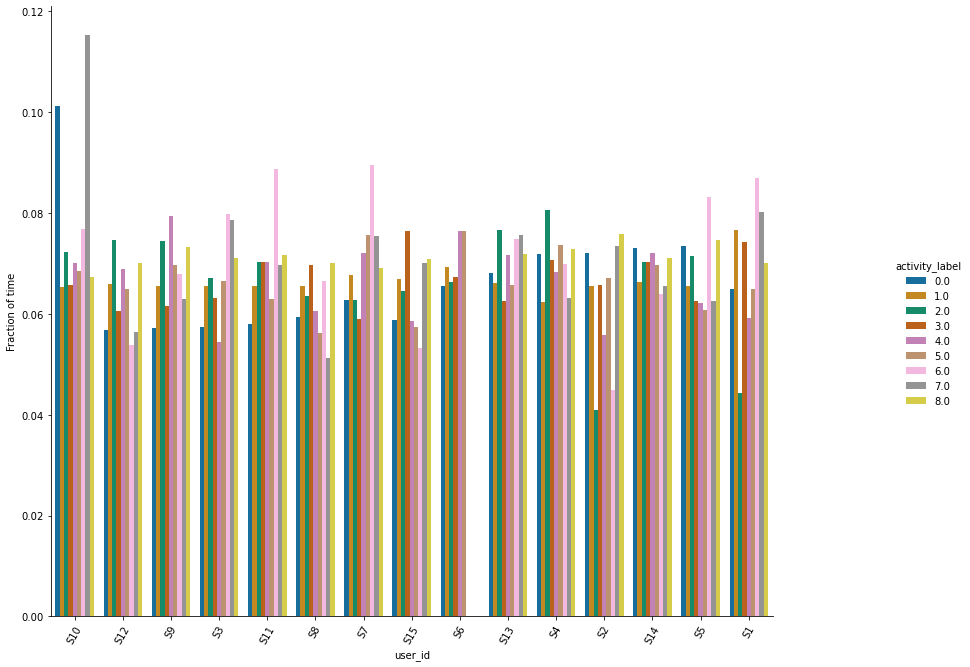

In [26]:
g_data = X_train\
            .groupby(['activity_label'])['user_id']\
            .apply(pd.Series.value_counts, normalize = True)\
            .rename('fraction')\
            .reset_index().rename(columns={'level_1':'user_id'})\
            .sort_values(by='activity_label',ascending = True)

g = sns.catplot(
                data = g_data
                ,x = 'user_id'
                ,y = 'fraction' 
                , kind = 'bar'
                , hue = 'activity_label'
                , palette = 'colorblind'
               )

g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.axes[0,0].set_xticklabels(g.axes[0,0].get_xticklabels(),rotation = 60)
g.axes[0,0].set_xlabel('user_id')
g.axes[0,0].set_ylabel('Fraction of time');

## determine scaling factors and scale X_train values
write custome function to scale X for modeling 
determine a average and std for each and apply standard scaling. scale BVP power spectra and ACC power sectra with two sets of mean and std (one for BVP and one for all ACC)

In [215]:
class ppg_scailer():
    temp_sp = ()
    eda_sp = ()
    bvp_sp = ()
    acc_sp = ()
    
    def fit(self,X):
        self.temp_sp = (X['skin_temp[C]'].min(), X['skin_temp[C]'].max())
        self.eda_sp = (X['EDA[microS]'].min(), X['EDA[microS]'].max())
        
        temp = np.concatenate(X_play['BVP_powerSpect'].values).ravel()
        self.bvp_sp = (temp.min(), temp.max())
        
        temp = np.concatenate(np.concatenate(X[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']].values)).ravel()
        self.acc_sp = (temp.min(), temp.max())    
    
    def transform(self,X):
        X_out = pd.DataFrame()
        X_out['skin_temp[C]'] = X['skin_temp[C]'].apply(lambda x: (x-self.temp_sp[0])/(self.temp_sp[1] - self.temp_sp[0]))
        
        X_out['EDA[microS]'] = X['EDA[microS]'].apply(lambda x: (x-self.eda_sp[0])/(self.eda_sp[1] - self.eda_sp[0]))
        
        X_out['BVP_powerSpect'] = X['BVP_powerSpect'].apply(lambda x: (x-self.bvp_sp[0])/(self.bvp_sp[1] - self.bvp_sp[0]))
        
        X_out[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']] = X[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']].apply(lambda x: (x-self.acc_sp[0])/(self.acc_sp[1] - self.acc_sp[0]))

        return X_out
    
    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)